# Imports

In [1]:
import pandas   as pd
import numpy    as np

from matplotlib         import pyplot   as plt
from sklearn            import metrics  as mt
from sklearn            import tree     as tr

# Load Dataset

In [2]:
#Lendo arquivo CSV de Treino
x_train = pd.read_csv('../../dataset/class/X_training.csv')
y_train = pd.read_csv('../../dataset/class/y_training.csv')

#Lendo arquivo CSV de teste
x_test = pd.read_csv('../../dataset/class/X_test.csv')
y_test = pd.read_csv('../../dataset/class/y_test.csv')

#Lendo arquivo CSV de Validação
x_val = pd.read_csv('../../dataset/class/X_validation.csv')
y_val = pd.read_csv('../../dataset/class/y_validation.csv')

In [3]:
#Seleção de Features
features = [  'customer_type', 'age', 'class', 'flight_distance',
              'inflight_wifi_service', 'departure_arrival_time_convenient',
              'ease_of_online_booking', 'gate_location', 'food_and_drink',
              'online_boarding', 'seat_comfort', 'inflight_entertainment',
              'on_board_service', 'leg_room_service', 'baggage_handling',
              'checkin_service', 'inflight_service', 'cleanliness',
              'departure_delay_in_minutes', 'arrival_delay_in_minutes',
              'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
              'type_of_travel_personal_travel']

#Tratamento dos dados
x_train = x_train.loc[:,features]
y_train = y_train.values.ravel()

x_val = x_val.loc[:,features]
y_val = y_val.values.ravel()

x_test = x_test.loc[:,features]
y_test = y_test.values.ravel()

# Model Training - DecisionTree Classifier (Training Data)

In [4]:
max_depth = np.arange(1,40,1)
acc_list = []
prec_list = []
recall_list = []
f1_list = []

for i in max_depth:
    #define
    model_tree = tr.DecisionTreeClassifier(max_depth=i)

    #fit
    model_tree.fit(x_train,y_train)

    #predict
    yhat_train = model_tree.predict(x_train)

    #performance
    acc_list.append(mt.accuracy_score(yhat_train,y_train))
    prec_list.append(mt.precision_score(yhat_train,y_train))
    recall_list.append(mt.recall_score(yhat_train,y_train))
    f1_list.append(mt.f1_score(yhat_train,y_train))

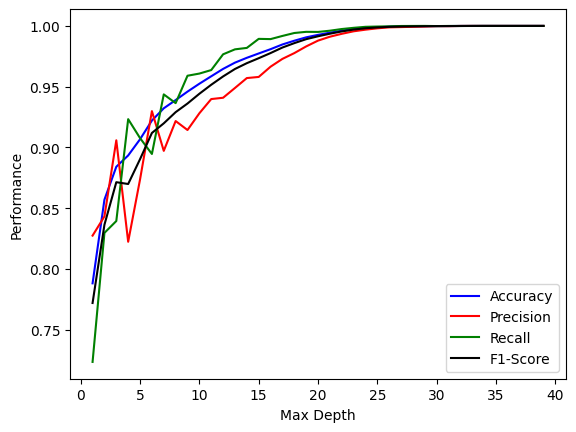

In [5]:
#Plot das métricas de performance em relação ao max_depth
plt.plot(max_depth,acc_list, c='b',label='Accuracy')
plt.plot(max_depth,prec_list, c='r',label='Precision')
plt.plot(max_depth,recall_list,c='g',label='Recall')
plt.plot( max_depth,f1_list,c='black',label='F1-Score')
plt.ylabel('Performance')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [6]:
#Achando melhor valor de max_depth

best_depth=acc_list.index(max(acc_list))
best_depth

33

# Model Training - DecisionTree Classifier (Validation Data)

In [7]:
#define
model_tree = tr.DecisionTreeClassifier(max_depth=best_depth)

#fit
model_tree.fit(x_train,y_train)

#predict
yhat_val = model_tree.predict(x_val)

#performance
acc_val = mt.accuracy_score(yhat_val,y_val)
print(f'Accuracy: {acc_val}')

prec_val = mt.precision_score(yhat_val,y_val)
print(f'Precision: {prec_val}')

recall_val = mt.recall_score(yhat_val,y_val)
print(f'Recall: {recall_val}')

f1_val = mt.f1_score(yhat_val,y_val)
print(f'F1-Score: {f1_val}')


Accuracy: 0.9439814665851539
Precision: 0.9391194594995916
Recall: 0.932129697862933
F1-Score: 0.935611524094826


# Model Training - DecisionTree Classifier (Test Data)

In [8]:
#define
model_tree = tr.DecisionTreeClassifier(max_depth=best_depth)

#fit
model_tree.fit( np.concatenate((x_train,x_val)),
                np.concatenate((y_train,y_val)))
                                

#predict
yhat_test = model_tree.predict(x_test)

#performance
acc_test = mt.accuracy_score(yhat_test,y_test)
print(f'Accuracy: {acc_test}')

prec_test = mt.precision_score(yhat_test,y_test)
print(f'Precision: {prec_test}')

recall_test = mt.recall_score(yhat_test,y_test)
print(f'Recall: {recall_test}')

f1_test = mt.f1_score(yhat_test,y_test)
print(f'F1-Score: {f1_test}')

Accuracy: 0.9465492604178736
Precision: 0.9407831060272768
Recall: 0.9376479873717443
F1-Score: 0.9392129304286718


/home/leprado06/.pyenv/versions/ensaio_ML/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Save Results

In [9]:
train_metrics = {
    "Algorithm": "Decision Tree Classifier",
    "Accuracy": np.round(acc_list[best_depth], 3),
    "Precision": np.round(prec_list[best_depth], 3),
    "Recall": np.round(recall_list[best_depth], 3),
    "F1": np.round(f1_list[best_depth], 3)
}
validation_metrics = {
    "Algorithm": "Decision Tree Classifier",
    "Accuracy": np.round(acc_val, 3),
    "Precision": np.round(prec_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1": np.round(f1_val, 3)
}
test_metrics = {
    "Algorithm": "Decision Tree Classifier",
    "Accuracy": np.round(acc_test, 3),
    "Precision": np.round(prec_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1": np.round(f1_test, 3)
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./clas_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./clas_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./clas_test_metrics.csv", mode="a", header=False)